## Problem Statement - The objective is to develop a machine learning model that can predict the power consumption (Zone 1 Power Consumption) of Wellington, New Zealand based on various environmental and meteorological factors. The goal is to create an accurate predictive model that can assist in managing energy resources efficiently and optimizing power consumption in that zone

# As per probelem statement we have to develop a ML model that will predict the power consumption

In [1]:
# importing all the necessary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
sns.set()

In [2]:
# uploaded the dataset

df = pd.read_csv('Data_Project.csv')

In [3]:
# checking the data

df.head()

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.08,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


### As a data scientist we need to check shape,information

In [4]:
df.shape

(52583, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  object 
 2   Humidity                      52558 non-null  object 
 3   Wind Speed                    52512 non-null  object 
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 3.6+ MB


In [6]:
df.describe()

,S no,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
count,52583.000000,52275.000000,52568.000000,52565.000000,52583.000000,52583.000000
mean,26292.000000,182.964247,74.872330,154.499191,0.009338,31061.821779
std,15179.548939,264.571351,124.084858,2.871553,0.096180,8021.057455
min,1.000000,0.004000,0.011000,150.000000,0.000000,9457.750760
25%,13146.500000,0.062000,0.122000,152.000000,0.000000,24738.858990
50%,26292.000000,5.226000,4.412000,155.000000,0.000000,31189.787230
75%,39437.500000,320.100000,100.500000,157.000000,0.000000,36721.582445
max,52583.000000,1163.000000,936.000000,159.000000,1.000000,52204.395120


In [7]:
# describe all column

df.describe(include='all')

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
count,52583.000000,52263,52558,52512,52275.000000,52568.000000,52565.000000,52583.000000,52583.000000
unique,NaN,3438,4444,549,NaN,NaN,NaN,NaN,NaN
top,NaN,20.76,85.9,0.082,NaN,NaN,NaN,NaN,NaN
freq,NaN,56,200,2296,NaN,NaN,NaN,NaN,NaN
mean,26292.000000,NaN,NaN,NaN,182.964247,74.872330,154.499191,0.009338,31061.821779
std,15179.548939,NaN,NaN,NaN,264.571351,124.084858,2.871553,0.096180,8021.057455
min,1.000000,NaN,NaN,NaN,0.004000,0.011000,150.000000,0.000000,9457.750760
25%,13146.500000,NaN,NaN,NaN,0.062000,0.122000,152.000000,0.000000,24738.858990
50%,26292.000000,NaN,NaN,NaN,5.226000,4.412000,155.000000,0.000000,31189.787230
75%,39437.500000,NaN,NaN,NaN,320.100000,100.500000,157.000000,0.000000,36721.582445


In [8]:
df.columns

Index(['S no', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Air Quality Index (PM)',
       'Cloudiness', ' Power Consumption in A Zone'],
      dtype='object')

In [9]:
# Checking the Duplicate 

df.duplicated().sum()

0

In [10]:
# Checking the null values

df.isnull().sum()

S no                              0
Temperature                     320
Humidity                         25
Wind Speed                       71
general diffuse flows           308
diffuse flows                    15
Air Quality Index (PM)           18
Cloudiness                        0
 Power Consumption in A Zone      0
dtype: int64

In [11]:
# missing value in %

df.isna().sum()/len(df)*100

S no                            0.000000
Temperature                     0.608562
Humidity                        0.047544
Wind Speed                      0.135025
general diffuse flows           0.585741
diffuse flows                   0.028526
Air Quality Index (PM)          0.034232
Cloudiness                      0.000000
 Power Consumption in A Zone    0.000000
dtype: float64

## ***Now we will change the data type of Temperature , Humidity and Wind Speed from object to float.....but here First we have to deal with the Nan value then only we Can change the data type other wise we will get error

In [12]:
# checking mode value so that we can fill nan

print(df['Temperature'].mode()[0])
print(df['Humidity'].mode()[0])
print(df['Wind Speed'].mode()[0])

20.76
85.9
0.082


In [13]:
# replacing the Nan with mode values

df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mode()[0])
df['Humidity'] = df['Humidity'].fillna(df['Humidity'].mode()[0])
df['Wind Speed'] = df['Wind Speed'].fillna(df['Wind Speed'].mode()[0])

In [14]:
# Now we are using different method to handle character that is regex

df['Temperature'] = pd.to_numeric(df['Temperature'].str.replace(r'[^0-9.]', '', regex=True), errors = 'coerce')
df['Humidity'] = pd.to_numeric(df['Humidity'].str.replace(r'[^0-9.]', '', regex=True), errors = 'coerce')
df['Wind Speed'] = pd.to_numeric(df['Wind Speed'].str.replace(r'[^0-9.]', '', regex=True), errors = 'coerce')

# **** we cant run this line multiple time it will throw the error because once data type is change and again we want to chnage means error will come*

In [15]:
# now data type is changed let's check the dtype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52583 non-null  float64
 2   Humidity                      52583 non-null  float64
 3   Wind Speed                    52583 non-null  float64
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 3.6 MB


In [16]:
#checking the nan value again

df.isnull().sum()

S no                              0
Temperature                       0
Humidity                          0
Wind Speed                        0
general diffuse flows           308
diffuse flows                    15
Air Quality Index (PM)           18
Cloudiness                        0
 Power Consumption in A Zone      0
dtype: int64

In [17]:
# now we will handle the Nan value in numrerical column
# we can use the Simple Imputer method as mention below but here we are handling manually because column count is less

# from sklearn.impute import SimpleImputer
# imp_method = SimpleImputer(missing_values=np.nan , strategy='median')


df['general diffuse flows'].fillna(df['general diffuse flows'].median(),inplace=True)
df['diffuse flows'].fillna(df['diffuse flows'].median(),inplace=True)
df['Air Quality Index (PM)'].fillna(df['Air Quality Index (PM)'].median(),inplace=True)

In [18]:
# now checking null values

df.isnull().sum()

S no                            0
Temperature                     0
Humidity                        0
Wind Speed                      0
general diffuse flows           0
diffuse flows                   0
Air Quality Index (PM)          0
Cloudiness                      0
 Power Consumption in A Zone    0
dtype: int64

In [19]:
df.describe()

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
count,52583.000000,52583.000000,52583.000000,52583.000000,52583.000000,52583.000000,52583.000000,52583.000000,52583.000000
mean,26292.000000,18.839145,68.294144,1.953430,181.923162,74.852230,154.499363,0.009338,31061.821779
std,15179.548939,5.797526,15.546216,2.347975,264.143797,124.072864,2.871077,0.096180,8021.057455
min,1.000000,3.247000,11.340000,0.050000,0.004000,0.011000,150.000000,0.000000,9457.750760
25%,13146.500000,14.450000,58.340000,0.078000,0.062000,0.122000,152.000000,0.000000,24738.858990
50%,26292.000000,18.880000,69.890000,0.086000,5.226000,4.412000,155.000000,0.000000,31189.787230
75%,39437.500000,22.870000,81.500000,4.915000,317.000000,100.450000,157.000000,0.000000,36721.582445
max,52583.000000,40.010000,94.800000,8.500000,1163.000000,936.000000,159.000000,1.000000,52204.395120


### Column 'S no' is not required for prediction so we will drop the column

In [20]:
df1 = df.drop('S no',axis = 1)

In [21]:
df1.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127
3,6.121,75.0,0.083,0.091,0.096,151.0,1,28228.86076
4,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


### Now we will handle outliers

In [22]:
# Here we will use the capping method to handle the outliers

# Identify numerical columns (excluding binary features)
num_cols = df1.select_dtypes(include=[np.number]).columns.tolist()

# Remove binary features (assumed to have only 0 & 1)
binary_cols = [col for col in num_cols if df1[col].nunique() == 2]
num_cols = list(set(num_cols) - set(binary_cols))

# Outlier Capping using IQR
for col in num_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Cap outliers
    df1[col] = np.where(df1[col] < lower_limit, lower_limit, df1[col])
    df1[col] = np.where(df1[col] > upper_limit, upper_limit, df1[col])


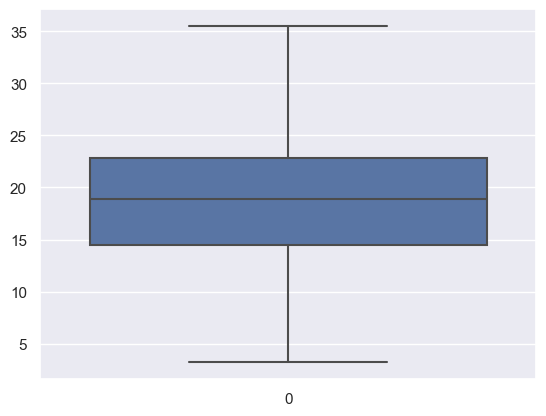

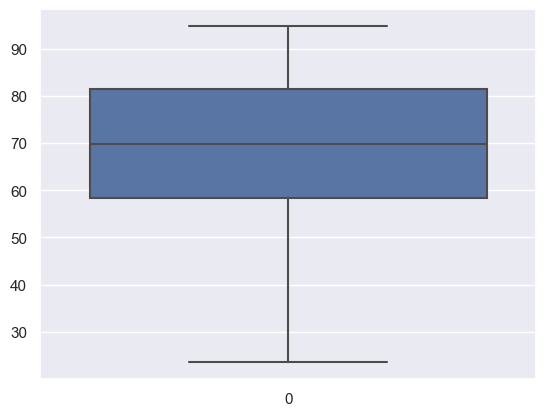

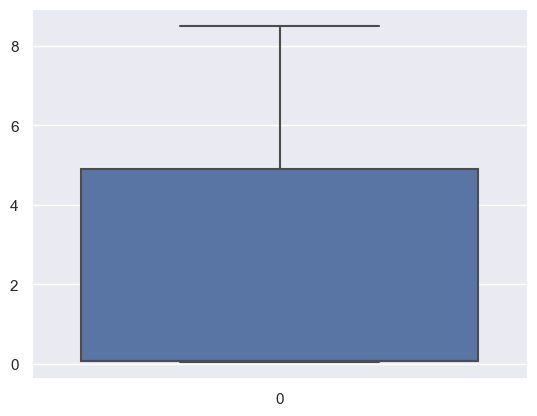

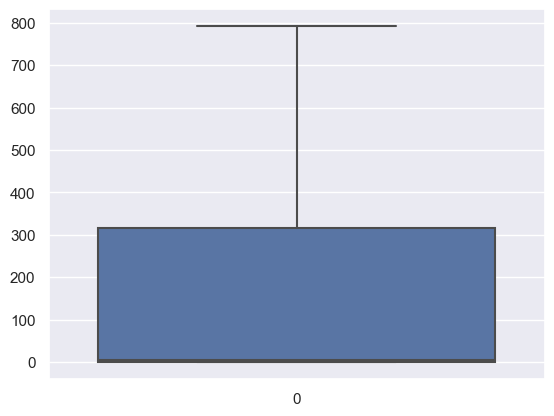

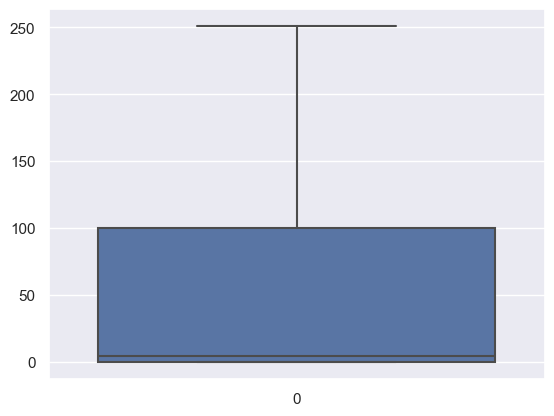

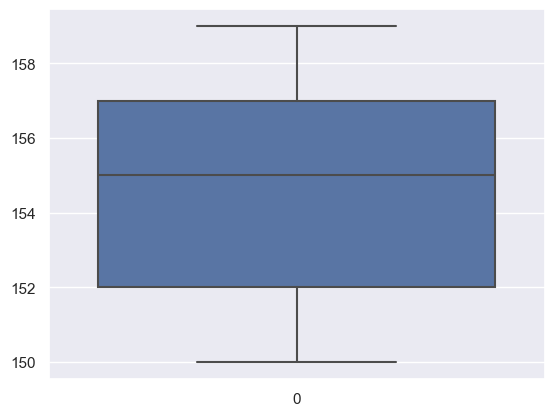

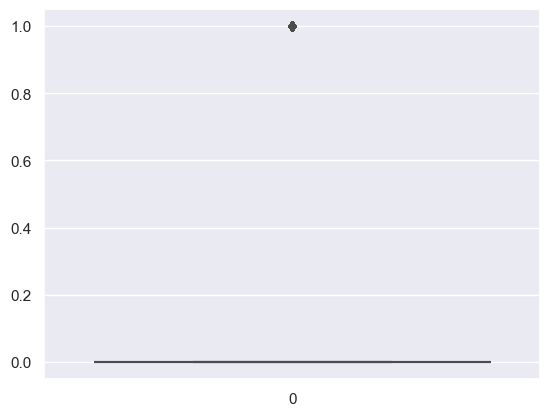

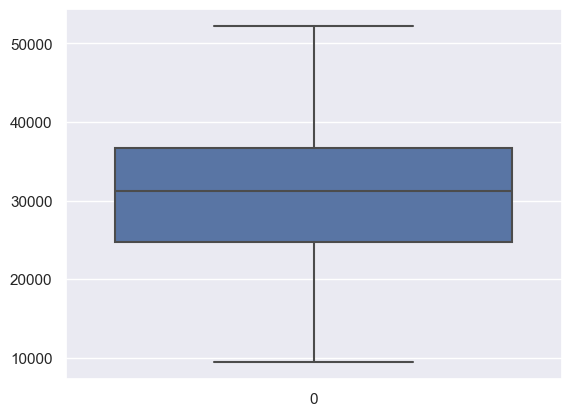

In [23]:
# checking outliers after replacing value

def box_plot(col):
    sns.boxplot(df1[col])
    plt.show()

for col in list(df1.select_dtypes(exclude = ['object']).columns)[0:]:
    box_plot(col)

In [24]:
df1.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127
3,6.121,75.0,0.083,0.091,0.096,151.0,1,28228.86076
4,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


### Spilitting the data into X and Y

In [25]:

X = df1.drop(' Power Consumption in A Zone',axis = 1)
y = df1[' Power Consumption in A Zone']

### now we will apply feature scaling on X data(independent data)

In [26]:
# importing the library

from sklearn.preprocessing import StandardScaler

#initialized the Library
scaler = StandardScaler()

In [27]:
#Performing the feature scaling

binary_column = ['Cloudiness']
numerical_column = X.drop(columns = binary_column).columns

x = X.copy()
x[numerical_column] = scaler.fit_transform(x[numerical_column])

In [28]:
# Checking the data after scaling

x.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness
0,-2.122199,0.354335,-0.796622,-0.696662,-0.729269,1.219288,1
1,-2.147265,0.399598,-0.796622,-0.696588,-0.729670,1.567593,1
2,-2.164726,0.399598,-0.797900,-0.696620,-0.729493,-1.218845,1
3,-2.197918,0.431929,-0.796622,-0.696507,-0.729541,-1.218845,1
4,-2.232492,0.477192,-0.797474,-0.696674,-0.729670,-0.173930,1


## Now Our Data cleaning 'EDA' is done we will proceed for model building 

### We will use multiples Regression algorithms to get the best accuracy 

In [29]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

In [30]:
from sklearn.datasets import make_regression
x, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

In [31]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define XGBoost regressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Define parameter grid for max_depth tuning
param_grid = {'max_depth': [3, 5, 7, 9, 11]}

# Perform Grid Search to find best max_depth
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best max_depth
best_max_depth = grid_search.best_params_['max_depth']
print(f"Best max_depth: {best_max_depth}")

# Train final model with best max_depth so that we can get the best accuracy
final_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=best_max_depth, random_state=42)
final_model.fit(X_train, y_train)

# Make predictions
y_pred = final_model.predict(X_test)

# Calculate accuracy (R² score)
accuracy = r2_score(y_test, y_pred)
print(f"Final Model R² Score: {accuracy:.4f}")

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Square error: {mse}")

Best max_depth: 3
Final Model R² Score: 0.9309
Mean Square error: 1165.0451993029326


### we can see MSE is a big number but as compair to our Target variable range it is a small value....Target variable range - "9000+ to 52000+"

In [32]:
# Let's check the Mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

MAE: 27.096188975218087


## using Random forest algorithm as well

In [33]:
# importing the Libraries

from sklearn.ensemble import RandomForestRegressor

# Define Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Hyperparameter tuning (grid search for best max_depth)
param_grid = {'max_depth': [3, 5, 10, 15, None]}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best max_depth
best_max_depth = grid_search.best_params_['max_depth']
print(f"Best max_depth: {best_max_depth}")

# Train final model with best max_depth
final_rf = RandomForestRegressor(n_estimators=100, max_depth=best_max_depth, random_state=42)
final_rf.fit(X_train, y_train)

# Make predictions
y_pred = final_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# printing the all score

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")

Best max_depth: 15
MSE: 2613.6434
RMSE: 51.1238
R² Score: 0.8451
MAE: 40.1987


### We are trying to check Feature Importance 

     Feature  Importance
3  Feature 3    0.334388
6  Feature 6    0.288307
9  Feature 9    0.207659
2  Feature 2    0.039776
0  Feature 0    0.037496
1  Feature 1    0.035543
7  Feature 7    0.014866
5  Feature 5    0.014742
4  Feature 4    0.013750
8  Feature 8    0.013473


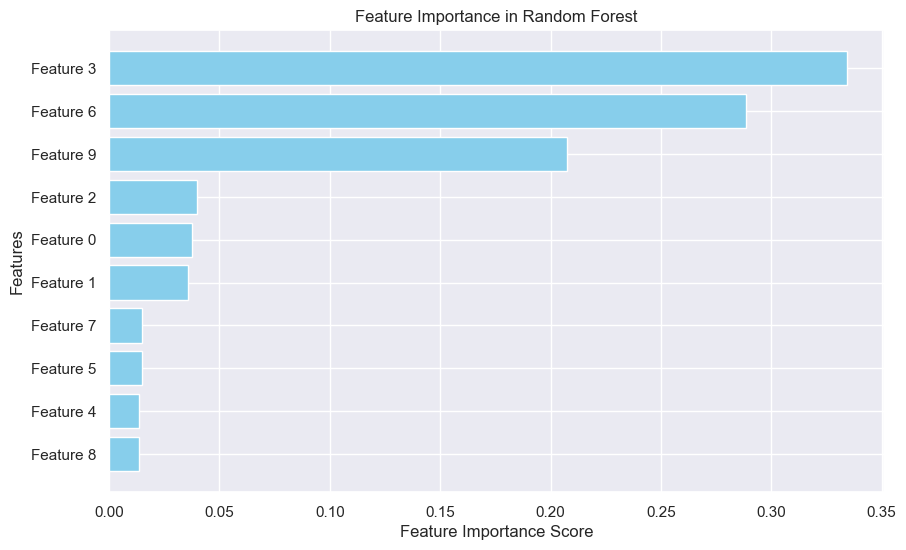

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Generate synthetic data (Replace with your dataset) as we have done above as well
from sklearn.datasets import make_regression
x, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = rf.feature_importances_

# Create feature names (replace with actual column names if using real dataset)
feature_names = [f"Feature {i}" for i in range(x.shape[1])]

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Print feature importance values
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


## Let's use the SVM as well

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
MSE: 0.0096
RMSE: 0.0978
R² Score: 1.0000
MAE: 0.0779


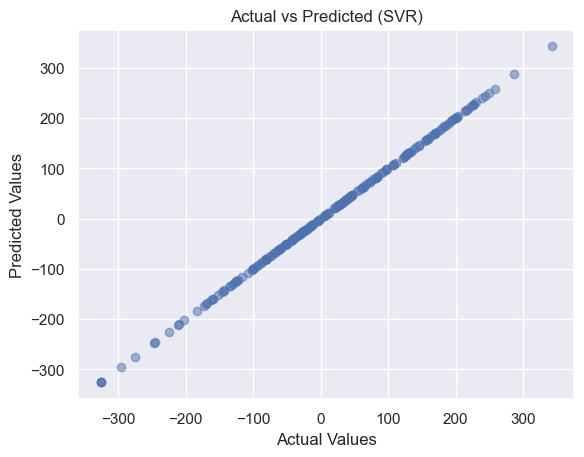

In [35]:
# Importing the library

from sklearn.svm import SVR

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize features (important for SVR)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test) 

# Define SVR model
svr = SVR()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],  # Different kernels
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the final SVR model with best parameters
final_svr = SVR(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'])
final_svr.fit(X_train, y_train)

# Make predictions
y_pred = final_svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (SVR)")
plt.show()

## Here we got 100% accuracy that is not acceptable

# Let's check with our Linear Regression method so that we can get our EDA part is good not not beacuse it will not peform any outliers handling by own

## Importing all the libraries

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred = lm.predict(X_test)

In [38]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [39]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.009511914910421877
r_square_value : 0.9999994362016347


# And here we got the best accuracy 99.99% and Error is also less "So we can say Liner Regression is best fit model"

Text(0, 0.5, 'Consumption')

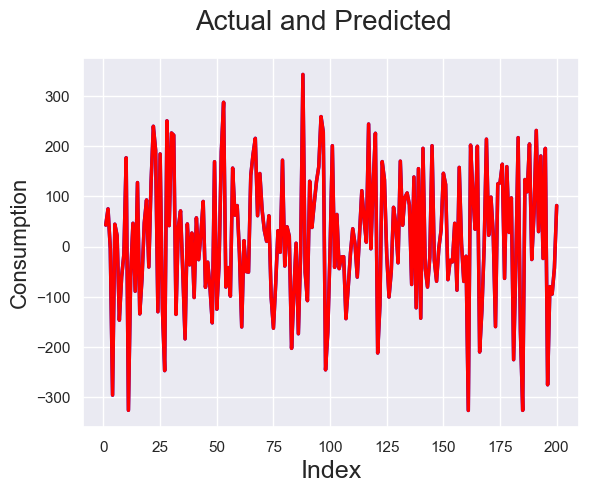

In [40]:
#Actual vs Predicted having all features
c = [i for i in range(1,201,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Consumption', fontsize=16)                               # Y-label

## We are not able to see blue line best Fit model

## END

In [41]:
# Predictions
train_predictions = lm.predict(X_train)
test_predictions = lm.predict(X_test)

In [42]:
# Evaluation
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

In [43]:
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

In [44]:
print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Training R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")

Training MSE: 0.009268106704051293
Test MSE: 0.009511914910421877
Training R-squared: 0.9999994730527467
Test R-squared: 0.9999994362016347
